In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_dir = "./"

def load_data(data_dir, train_row):
    train = pd.read_csv(data_dir + "train.csv")
    print(train.shape)
    X_train = train.values[0:train_row, 1:]
    y_train = train.values[0:train_row, 0]
    
    Pred_test = pd.read_csv(data_dir + "test.csv").values
    return X_train, y_train, Pred_test

train_row = 5000    # for all data, use 42000
Origin_X_train, Origin_y_train, Origin_y_test = load_data(data_dir, train_row)

(42000, 785)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_vali, y_train, y_vali = train_test_split(Origin_X_train, Origin_y_train, test_size = 0.2, random_state = 0)

print(X_train.shape, X_vali.shape, y_train.shape, y_vali.shape)

(4000, 784) (1000, 784) (4000,) (1000,)


In [4]:
class knn():
    def __init__(self):
        pass
    
    def train(self, X, y):
        # X is the feature of the training data
        # y is the label vector of the training data
        self.X_train = X
        self.y_train = y
        
    def predict(self, X, num, k):
        # X is the feature of the data to predict
        dataSet = X_train
        labels = y_train
        dataSetSize = dataSet.shape[0]
        
        # np.tile: repeat an array several times
        # a = np.array([0, 1, 2])
        # np.tile(a, (2, 3))
        # array([0, 1, 2, 0, 1, 2, 0, 1, 2], [0, 1, 2, 0, 1, 2, 0, 1, 2])
        
        diffMat = np.tile(X, (dataSetSize, 1)) - dataSet
        sqDiffMat = diffMat ** 2    # square of difference in each dim for each instance
        sumDiffMat = sqDiffMat.sum(axis=1)    # square of Euclidean distance
        distances = sumDiffMat ** 0.5   # Euclidean distance
        
        # np.argsort: return index of elements after sorting in accending order
        # x = np.array([300, 100, 200])
        # np.argsort(x)
        # array([1, 2, 0])
        sortedDistances = distances.argsort()
        # sortedDistances = [2, 3, 1, 0, 5, 7, 8, 6]
        
        classCount = {}   # classCount[i] is the number of times label "i" appears in top k positions
        for i in range(k):
            vote = labels[sortedDistances[i]]
            classCount[vote] = classCount.get(vote, 0) + 1
        
        max = 0
        ans = 0
        for k, v in classCount.items():
            if v > max:
                ans = k
                max = v
        
        return ans

In [5]:
from sklearn.metrics import accuracy_score
classifier = knn()
classifier.train(X_train, y_train)

In [6]:
from tqdm import tqdm
# python -m pip install tqdm
max = 0
ans_k = 0
for k in range(1, 5):
    print('k = ', k, 'start prediction')
    predictions = np.zeros(len(y_vali))
    for i in tqdm(range(X_vali.shape[0])):
        output = classifier.predict(X_vali[i], i, k)
        predictions[i] = output
        
    accuracy = accuracy_score(y_vali, predictions)
    print('k = ', k, 'accuracy = ', accuracy)
    if accuracy > max:
        max = accuracy
        ans_k = k

k =  1 start prediction


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 32.95it/s]


k =  1 accuracy =  0.919
k =  2 start prediction


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 32.80it/s]


k =  2 accuracy =  0.919
k =  3 start prediction


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 32.80it/s]


k =  3 accuracy =  0.925
k =  4 start prediction


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 32.37it/s]


k =  4 accuracy =  0.924


In [7]:
k = 3
Origin_y_test = Origin_y_test[:300]
predictions = np.zeros(Origin_y_test.shape[0])
for i in range(Origin_y_test.shape[0]):
    if i % 100 == 0:
        print(i, '/', Origin_y_test.shape[0])
    predictions[i] = classifier.predict(Origin_y_test[i], i, k)

0 / 300
100 / 300
200 / 300


2.0


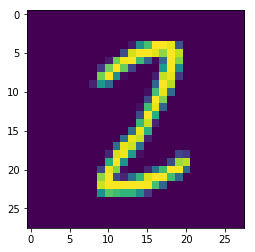

In [9]:
id = 102
print(predictions[id])
plt.imshow(Origin_y_test[id].reshape((28, 28)))
plt.show()

In [10]:
out_file = open("predictions.csv", "w")
out_file.write("ImageId, Label\n")
for i in range(len(predictions)):
    out_file.write(str(i + 1) + "," + str(int(predictions[i])) + "\n")
out_file.close()